In [3]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%autoreload 2
from src.model import mlp_model
from keras.wrappers.scikit_learn import KerasClassifier
from src.utils import load_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import os
from sklearn import metrics

# Features

In [68]:
feature = "cache/E017/feature/bin_10_400kb.xlsx"
df_y = pd.read_excel(feature, sheet_name='y').fillna(0)
df_n = pd.read_excel(feature, sheet_name='n').fillna(0)

In [69]:
df_y.head()

,chr#,start,end,label,E017-H3K4me3_-10,E017-H3K4me3_-9,E017-H3K4me3_-8,E017-H3K4me3_-7,E017-H3K4me3_-6,E017-H3K4me3_-5,...,E017-H3K4me1_1,E017-H3K4me1_2,E017-H3K4me1_3,E017-H3K4me1_4,E017-H3K4me1_5,E017-H3K4me1_6,E017-H3K4me1_7,E017-H3K4me1_8,E017-H3K4me1_9,E017-H3K4me1_10
0,chr1,1660000,1700000,1,170032.17,140958.87,71460.20,67426.41,58368.61,12366.67,...,37511.43,57584.17,16375.65,19555.45,56770.14,36839.89,32609.93,37953.63,13569.88,25168.27
1,chr1,2220000,2260000,1,59670.66,116850.15,72660.92,104829.60,56861.27,22531.02,...,22888.88,16408.02,24552.77,29718.07,49746.73,26495.97,117945.45,111763.24,163759.19,109529.19
2,chr1,2700000,2740000,1,6951.29,16896.06,15113.00,17712.92,7564.38,89830.78,...,65532.60,32647.26,75827.77,32833.51,28990.62,15618.92,1103.07,169.70,1822.05,3041.60
3,chr1,4060000,4100000,1,5916.25,6256.21,10314.47,8262.15,48241.69,6631.36,...,19530.20,23362.10,28057.28,2683.56,602.04,3258.88,3275.65,3570.71,2417.44,1547.92
4,chr1,6480000,6520000,1,3168.97,3934.61,2702.68,3768.50,3189.31,3960.62,...,17196.91,51258.68,35442.76,61999.94,39775.36,63197.52,41958.23,41127.98,39107.71,35249.26


In [70]:
df_y.filter(regex='E017-H3K4me3.*').head()

,E017-H3K4me3_-10,E017-H3K4me3_-9,E017-H3K4me3_-8,E017-H3K4me3_-7,E017-H3K4me3_-6,E017-H3K4me3_-5,E017-H3K4me3_-4,E017-H3K4me3_-3,E017-H3K4me3_-2,E017-H3K4me3_-1,...,E017-H3K4me3_1,E017-H3K4me3_2,E017-H3K4me3_3,E017-H3K4me3_4,E017-H3K4me3_5,E017-H3K4me3_6,E017-H3K4me3_7,E017-H3K4me3_8,E017-H3K4me3_9,E017-H3K4me3_10
0,170032.17,140958.87,71460.20,67426.41,58368.61,12366.67,29423.22,51276.65,108409.04,169662.33,...,186748.02,49659.11,64593.19,59670.66,116850.15,72660.92,104829.60,56861.27,22531.02,50359.69
1,59670.66,116850.15,72660.92,104829.60,56861.27,22531.02,50359.69,15264.68,6991.39,110932.68,...,7507.46,6951.29,16896.06,15113.00,17712.92,7564.38,89830.78,167505.23,15620.29,35175.48
2,6951.29,16896.06,15113.00,17712.92,7564.38,89830.78,167505.23,15620.29,35175.48,5568.36,...,16017.07,7520.72,68278.26,22534.42,79106.98,38567.61,1938.69,397.37,1667.66,3532.31
3,5916.25,6256.21,10314.47,8262.15,48241.69,6631.36,89843.68,31302.25,9237.15,39080.67,...,57444.95,66701.23,68167.79,2904.30,661.22,3441.17,3703.05,1872.93,3195.49,3007.61
4,3168.97,3934.61,2702.68,3768.50,3189.31,3960.62,5200.13,65013.10,6911.09,5622.47,...,5981.49,73939.39,62754.67,45420.01,5311.06,8329.62,68037.65,22612.91,85233.38,25953.36


In [71]:
import re
r = re.compile('.*-10')
data_list = list(filter(r.match, df_y.columns))
data_list = [i[:-4] for i in data_list]
data_list

['E017-H3K4me3',
 'E017-H3K4me2',
 'E017-H3K36me3',
 'E017-CTCF',
 'E017-H3K27me3',
 'E017-H3K9me3',
 'E017-H3K27ac',
 'E017-H3K9ac',
 'E017-H3K4me1']

In [72]:
df_y_sum = df_y.iloc[:, :4]
for label in data_list:
    df_y_sum[label] = df_y.filter(regex='{}.*'.format(label)).mean(axis=1, skipna=True)
df_y_sum.head()

,chr#,start,end,label,E017-H3K4me3,E017-H3K4me2,E017-H3K36me3,E017-CTCF,E017-H3K27me3,E017-H3K9me3,E017-H3K27ac,E017-H3K9ac,E017-H3K4me1
0,chr1,1660000,1700000,1,88456.576190,47592.388571,94241.215238,35429.649524,27930.459048,16805.516190,57416.330952,61261.720952,50287.722857
1,chr1,2220000,2260000,1,49941.585238,37653.182381,69163.520476,31759.940000,46919.969048,22791.208095,50085.103333,50490.460476,52373.204286
2,chr1,2700000,2740000,1,35454.485714,30540.305714,35329.670000,30474.127143,57876.031905,42204.270000,37469.743810,42102.236190,46983.234762
3,chr1,4060000,4100000,1,24761.556190,18769.539524,41071.684286,28452.709048,51237.641905,54120.424286,13139.676190,24369.530000,22865.328571
4,chr1,6480000,6520000,1,24434.733333,21531.486667,45506.060952,36483.693810,54107.617143,40432.334762,14724.657619,28649.142857,29366.962857


In [73]:
df_n_sum = df_n.iloc[:, :4]
for label in data_list:
    df_n_sum[label] = df_n.filter(regex='{}.*'.format(label)).mean(axis=1, skipna=True)
df_n_sum.head()

,chr#,start,end,label,E017-H3K4me3,E017-H3K4me2,E017-H3K36me3,E017-CTCF,E017-H3K27me3,E017-H3K9me3,E017-H3K27ac,E017-H3K9ac,E017-H3K4me1
0,chr1,33898532,33938532,0,30572.763333,31641.862857,47234.537619,44917.642857,33448.964286,23917.856667,35820.864286,36417.836667,40741.113333
1,chr1,2448995,2488995,0,41071.792857,36295.930476,59020.512857,36344.762381,60717.063810,25164.250476,46753.521905,49250.176667,56755.640000
2,chr1,3564054,3604054,0,14175.471429,13407.269048,21449.545714,28521.675714,59486.278095,79473.674762,9975.625714,19048.100476,20125.043333
3,chr1,24501708,24541708,0,35415.826190,30878.218095,35310.779524,38942.253810,74501.797619,25587.511429,31485.671429,39612.432857,31385.650000
4,chr1,64362786,64402786,0,14715.776190,20666.833333,26028.835714,26532.464286,34367.158095,17639.096667,18073.103333,21614.352381,28471.304286


### Feature correlation

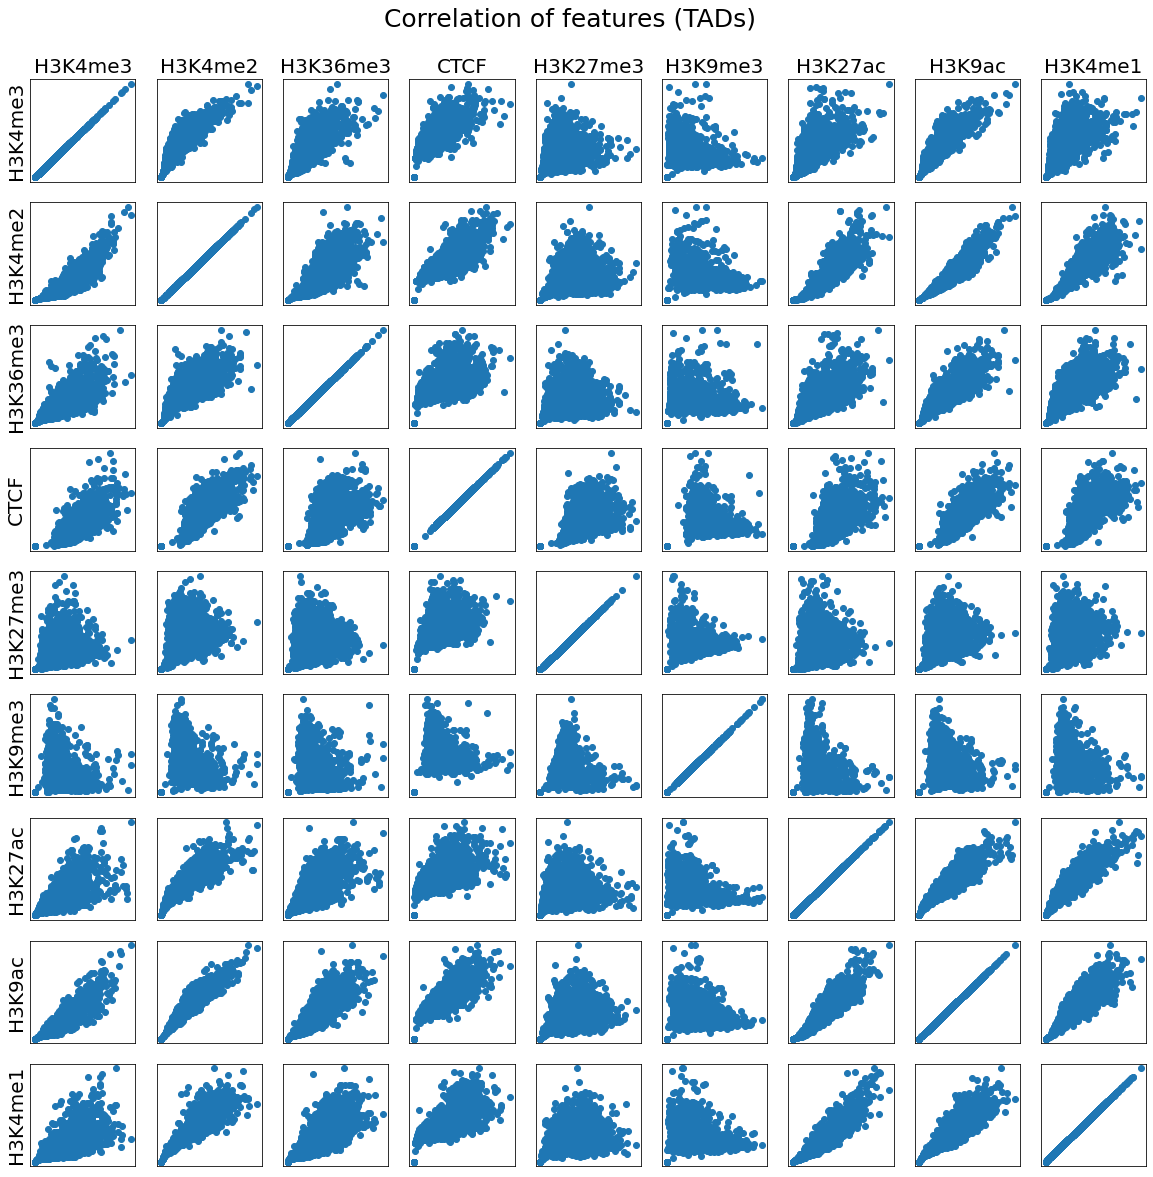

In [74]:
plt.rcParams["figure.figsize"] = (20,20)
def corr_plot(df):
    fig, ax = plt.subplots(9, 9)
    for i in range (len(data_list)):
        for j in range(len(data_list)):
            ax[i, j].scatter(df[data_list[i]], df[data_list[j]])
            ax[i, j].axes.xaxis.set_ticks([])
            ax[i, j].axes.yaxis.set_ticks([])
    for i in range(len(data_list)):
        ax[0, i].set_title(data_list[i][5:], size = 20)
        ax[i, 0].set_ylabel(data_list[i][5:], size = 20)
    return fig

fig_y = corr_plot(df_y_sum)
fig_y.suptitle('Correlation of features (TADs)', size=25, y=0.93)
fig_y.savefig('feature_correlation_plot_positive.png')


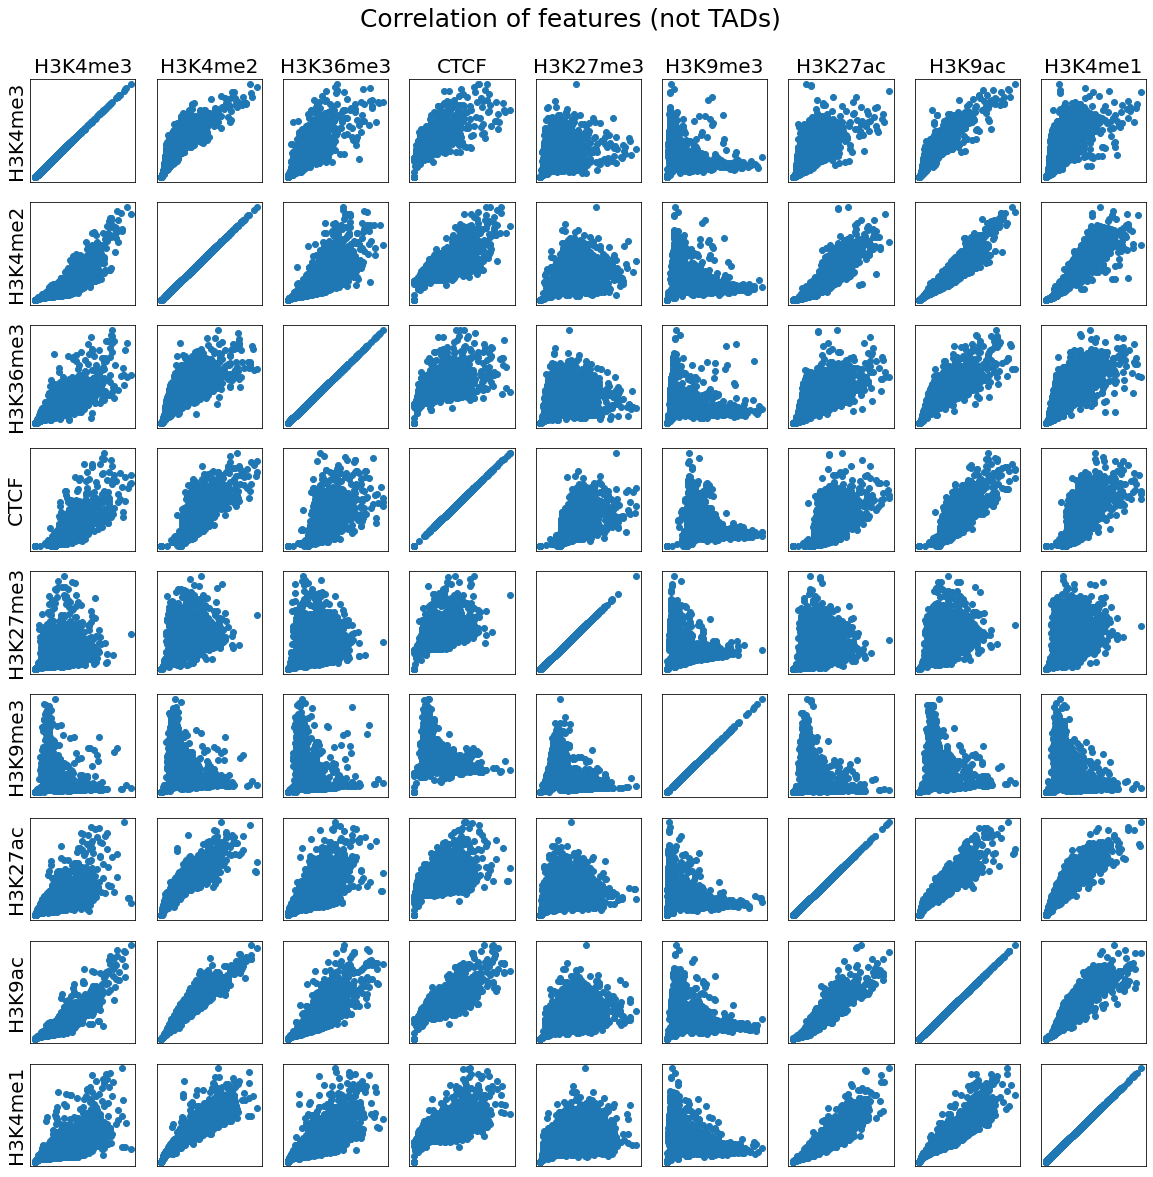

In [75]:
fig_n = corr_plot(df_n_sum)
fig_n.suptitle('Correlation of features (not TADs)', size=25, y=0.93)
fig_n.savefig('feature_correlation_plot_negative.png')

In [76]:
def corr_table(df, names):
    corr_list = []
    for i in range(len(names)):
        corr_list.append([])
        for j in range(len(names)):
            r = np.corrcoef(df[names[i]], df[names[j]])
            corr_list[i].append(r[0, 1])
    corr_df = pd.DataFrame(corr_list)
    corr_df.columns = [i[5:] for i in names]
    corr_df.index = [i[5:] for i in names]
    return corr_df
corr_table_y = corr_table(df_y_sum, data_list)
corr_table_n = corr_table(df_n_sum, data_list)

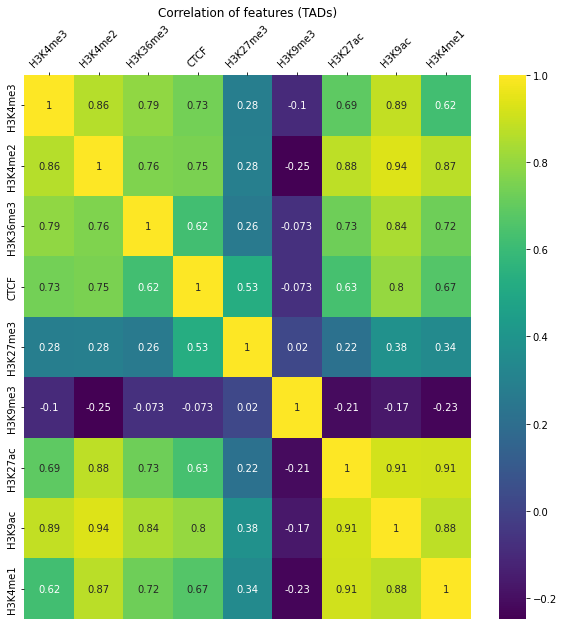

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax = sns.heatmap(corr_table_y, cmap='viridis', annot=True)
ax.set_title('Correlation of features (TADs)')
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', labelrotation = 45)
fig.savefig('feature_correlation_heatmap_positive.png', dpi=200)

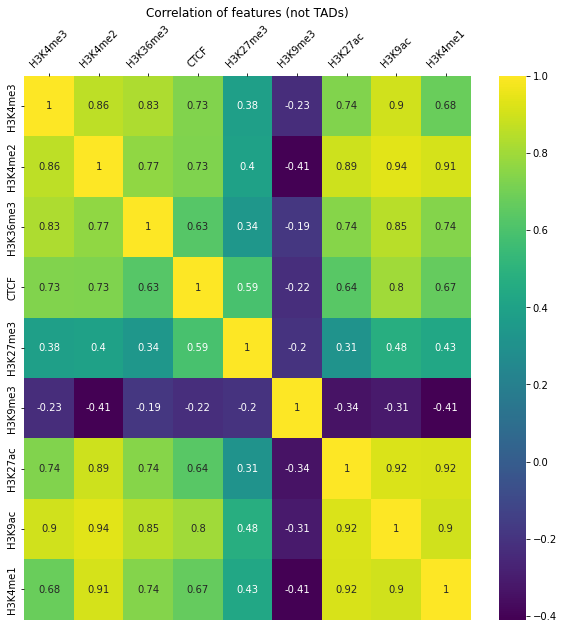

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax = sns.heatmap(corr_table_n, cmap='viridis', annot=True)
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', labelrotation = 45)
ax.set_title('Correlation of features (not TADs)')
fig.savefig('feature_correlation_heatmap_negative.png', dpi=200)

### Heatmap - fold change windows

In [105]:
fold_change = df_y.iloc[:, 4:].sum(axis=0) / df_n.iloc[:, 4:].sum(axis=0)
fold_change = np.log2(fold_change)
fold_change_df = pd.DataFrame(np.zeros((9, 21)), index = data_list, columns = np.arange(-10, 11, 1)) # to reformat in a table: window vs histone modification

for label in data_list:
    fold_change_df.loc[label] = list(fold_change.filter(regex='{}.*'.format(label)))

fold_change_df.index = [i[5:] for i in fold_change_df.index]

In [106]:
fold_change_df

,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,...,1,2,3,4,5,6,7,8,9,10
H3K4me3,0.331977,0.388951,0.384883,0.373683,0.352351,0.335650,0.317807,0.287958,0.493110,0.658040,...,0.622748,0.532710,0.508107,0.284905,0.465065,0.330140,0.305438,0.322974,0.345409,0.253684
H3K4me2,0.255269,0.275975,0.273398,0.269526,0.280714,0.274508,0.281789,0.246530,0.312220,0.314540,...,0.313980,0.328334,0.346728,0.249517,0.335968,0.298562,0.276003,0.262440,0.265552,0.208362
H3K36me3,0.358357,0.327296,0.412619,0.367525,0.371219,0.310264,0.333779,0.406311,0.437194,0.682071,...,0.705321,0.490547,0.393022,0.366938,0.317424,0.362985,0.453870,0.408260,0.290278,0.280023
CTCF,0.150540,0.111122,0.173442,0.147954,0.099416,0.076124,0.142326,0.103337,0.232854,0.526118,...,0.555662,0.279664,0.094427,0.053150,0.141234,0.104443,0.175548,0.131593,0.088035,0.089234
H3K27me3,0.135804,0.198120,0.179245,0.180730,0.221564,0.235532,0.236795,0.249093,0.242284,0.212375,...,0.205000,0.203896,0.188344,0.153504,0.183634,0.196421,0.171263,0.145907,0.132867,0.164937
H3K9me3,-0.129632,-0.121289,-0.169353,-0.169962,-0.179640,-0.187743,-0.215563,-0.243776,-0.319569,-0.415093,...,-0.395699,-0.270586,-0.200071,-0.114843,-0.089333,-0.094700,-0.096799,-0.119606,-0.123080,-0.098334
H3K27ac,0.349680,0.461510,0.460613,0.389881,0.383618,0.417463,0.434126,0.416005,0.449255,0.398714,...,0.361983,0.449063,0.526189,0.477787,0.483681,0.416817,0.395332,0.440244,0.341002,0.231782
H3K9ac,0.315155,0.347428,0.360265,0.328053,0.327617,0.334477,0.337098,0.320974,0.392795,0.461692,...,0.438676,0.422388,0.428141,0.338491,0.386280,0.341632,0.333744,0.319754,0.289256,0.248534
H3K4me1,0.320252,0.351146,0.356297,0.356415,0.343095,0.360916,0.383954,0.343734,0.312871,0.218023,...,0.258891,0.331289,0.383334,0.349723,0.386760,0.387011,0.358039,0.345204,0.320811,0.270937


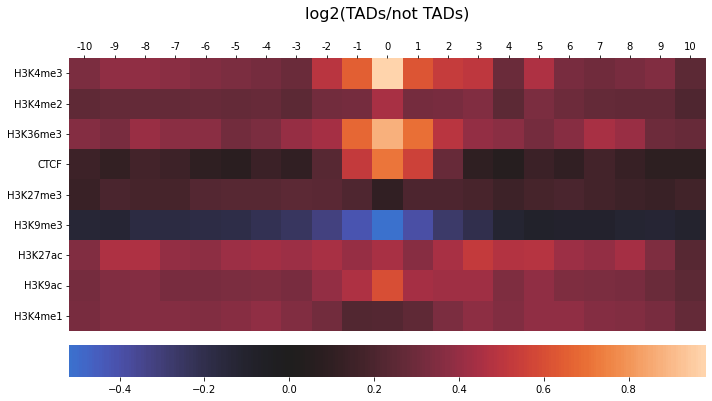

In [154]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax = sns.heatmap(fold_change_df, cmap='icefire', square=True, center=0, cbar_kws={'location':'bottom', 'pad':0.02})
ax.tick_params(axis='y', labelrotation = 0)
ax.xaxis.set_ticks_position('top')
ax.set_title('log2(TADs/not TADs)', size=16, pad = 40)
fig.tight_layout()
fig.savefig('heatmap_logfoldchange_features.png', dpi=200)

### Distribution of features boxplots

In [202]:
df_sum = pd.concat([df_y_sum, df_n_sum], axis=0)
df_sum_melted = pd.melt(df_sum, value_vars=df_sum.columns.values[4:], id_vars=df_sum.columns.values[:4])

In [229]:
df_sum_melted['variable']=df_sum_melted['variable'].str.slice(start=5)
df_sum_melted.head()

,chr#,start,end,label,variable,value
0,chr1,1660000,1700000,1,H3K4me3,88456.576190
1,chr1,2220000,2260000,1,H3K4me3,49941.585238
2,chr1,2700000,2740000,1,H3K4me3,35454.485714
3,chr1,4060000,4100000,1,H3K4me3,24761.556190
4,chr1,6480000,6520000,1,H3K4me3,24434.733333


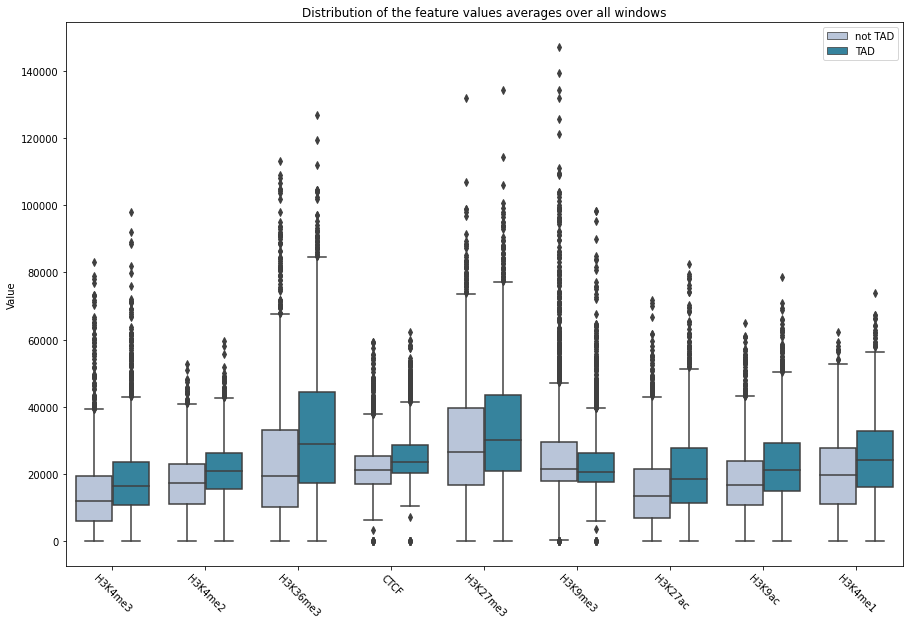

In [244]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax = sns.boxplot(x='variable', y='value', hue='label', data=df_sum_melted, palette='PuBuGn')
# Box: between Q1 and Q3, whiskers: Q1-1.5IQR, Q3+1.5IQR
ax.set(xlabel=None, ylabel='Value')
leg = ax.legend()
leg.get_texts()[0].set_text('not TAD')
leg.get_texts()[1].set_text('TAD')
ax.tick_params(axis='x', labelrotation = -45)
ax.set_title('Distribution of the feature values averages over all windows')
fig.savefig('feature_distribution_boxplot.png')

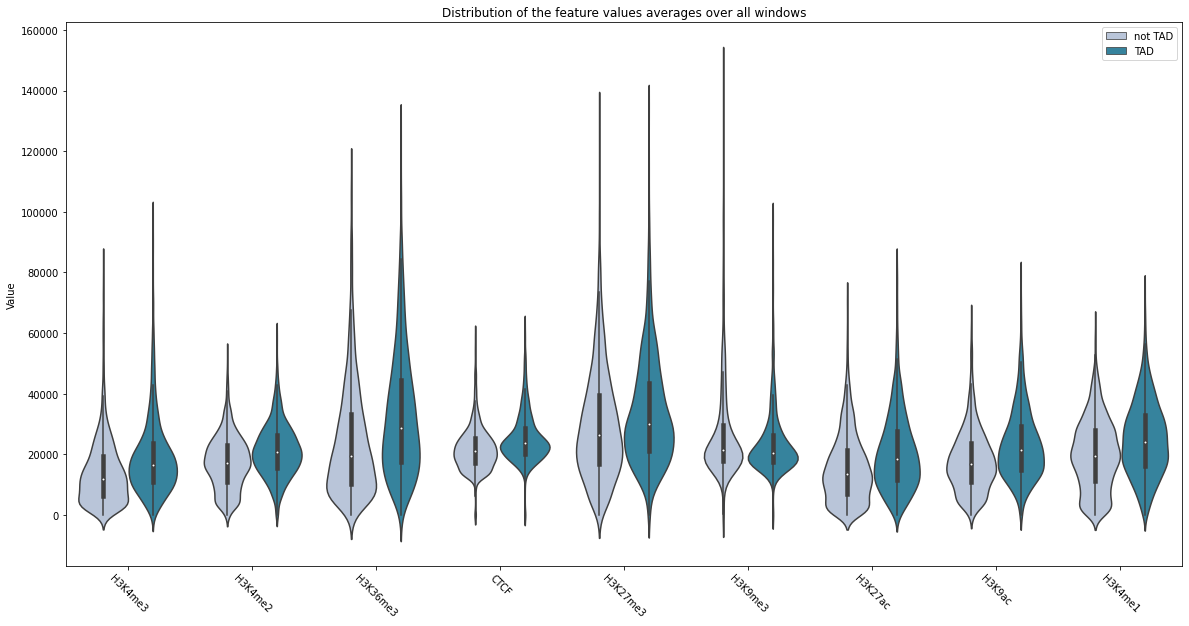

In [245]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.violinplot(x='variable', y='value', hue='label', data=df_sum_melted,  palette='PuBuGn')
ax.set(xlabel=None, ylabel='Value')
leg = ax.legend()
leg.get_texts()[0].set_text('not TAD')
leg.get_texts()[1].set_text('TAD')
ax.tick_params(axis='x', labelrotation = -45)
ax.set_title('Distribution of the feature values averages over all windows')
fig.savefig('feature_distribution_violinplot.png')

In [270]:
df_concat = pd.concat([df_y, df_n], axis=0)
def one_feature_df(df, modification):
    r = re.compile('.*{}.*'.format(modification))
    colnames = list(filter(r.match, df.columns))
    df_melted = pd.melt(df, value_vars=df[colnames], id_vars=df.columns.values[:4])
    df_melted['variable']=df_melted['variable'].str.split('_').str.get(-1)
    return df_melted

In [274]:
one_feature_df(df_concat, 'H3K9ac').head()

,chr#,start,end,label,variable,value
0,chr1,1660000,1700000,1,-10,104558.91
1,chr1,2220000,2260000,1,-10,43883.35
2,chr1,2700000,2740000,1,-10,20189.40
3,chr1,4060000,4100000,1,-10,17155.04
4,chr1,6480000,6520000,1,-10,6754.05


In [289]:
def one_feature_boxplot(df, modification):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    ax = sns.boxplot(x='variable', y='value', hue='label', data=df, palette='PuBuGn')
    # Box: between Q1 and Q3, whiskers: Q1-1.5IQR, Q3+1.5IQR
    ax.set(xlabel='Window', ylabel='Value')
    leg = ax.legend()
    leg.get_texts()[0].set_text('not TAD')
    leg.get_texts()[1].set_text('TAD')
    ax.set_title('Distribution of the {}'.format(modification))
    fig.savefig('{}_distribution_boxplot.png'.format(modification), dpi=200)

In [276]:
def one_feature_violinplot(df, modification):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 10)
    ax = sns.violinplot(x='variable', y='value', hue='label', data=df, palette='PuBuGn')
    # Box: between Q1 and Q3, whiskers: Q1-1.5IQR, Q3+1.5IQR
    ax.set(xlabel='Window', ylabel='Value')
    leg = ax.legend()
    leg.get_texts()[0].set_text('not TAD')
    leg.get_texts()[1].set_text('TAD')
    ax.set_title('Distribution of the {}'.format(modification))
    fig.savefig('{}_distribution_violinplot.png'.format(modification))

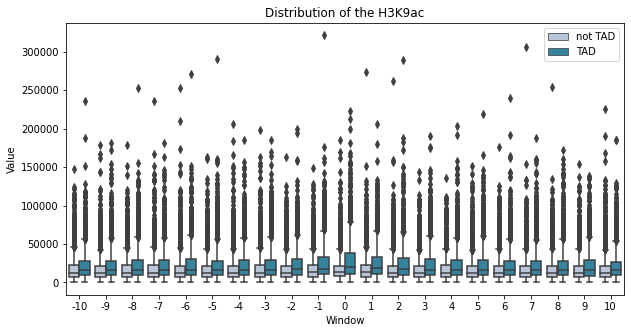

In [292]:
# H3K9ac
mod = 'H3K9ac'
one_feature_boxplot(one_feature_df(df_concat, mod), mod)

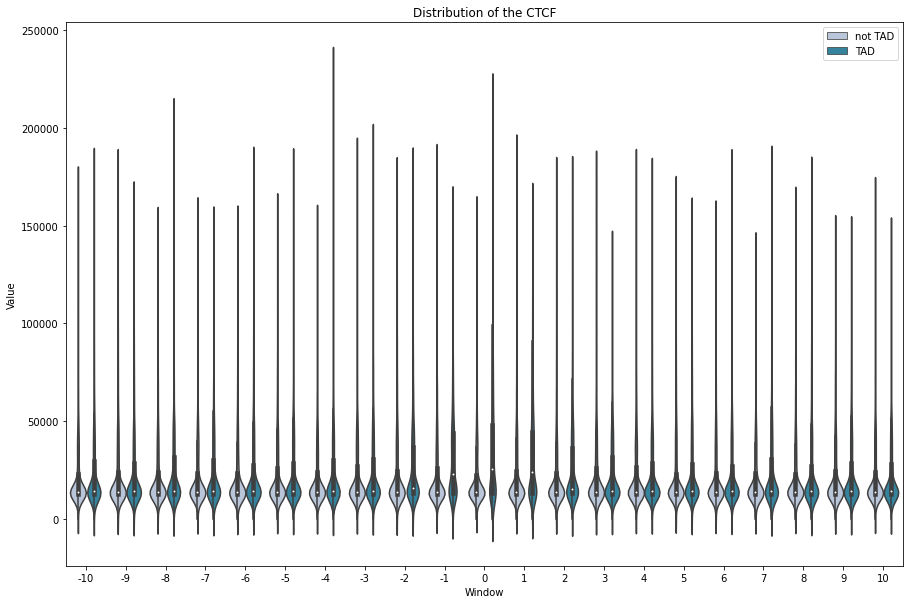

In [282]:
mod = 'CTCF'
one_feature_violinplot(one_feature_df(df_concat, mod), mod)

# Loss and accuracy plots

In [42]:
feature_data = "cache/E017/feature/bin_10_400kb.xlsx"
excluded_data = False
(x_train_mlp, y_train_mlp), (x_test_mlp, y_test_mlp) = load_data.mlp(feature=feature_data, exclude=excluded_data)
clf_mlp = KerasClassifier(build_fn=mlp_model.mlp, input=x_train_mlp, epochs=60, batch_size=128, verbose=0)
history60 = clf_mlp.fit(x_train_mlp, y_train_mlp, validation_data=(x_test_mlp, y_test_mlp))


c:\Users\liza_\Documents\2. Studium\6 Semester\Bachelorarbeit\TAD-Lactuca\src\utils\load_data.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_y.append(df_n)
C:\Users\liza_\AppData\Local\Temp\ipykernel_3828\448975662.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf_mlp = KerasClassifier(build_fn=mlp_model.mlp, input=x_train_mlp, epochs=60, batch_size=128, verbose=0)


In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
clf_mlp = KerasClassifier(build_fn=mlp_model.mlp, input=x_train_mlp, epochs=100, batch_size=128, verbose=0)
history100 = clf_mlp.fit(x_train_mlp, y_train_mlp, validation_data=(x_test_mlp, y_test_mlp))

C:\Users\liza_\AppData\Local\Temp\ipykernel_3828\4158089889.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf_mlp = KerasClassifier(build_fn=mlp_model.mlp, input=x_train_mlp, epochs=100, batch_size=128, verbose=0)


In [39]:
clf_mlp = KerasClassifier(build_fn=mlp_model.mlp, input=x_train_mlp, epochs=200, batch_size=128, verbose=0)
history200 = clf_mlp.fit(x_train_mlp, y_train_mlp, validation_data=(x_test_mlp, y_test_mlp))

C:\Users\liza_\AppData\Local\Temp\ipykernel_3828\933335661.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf_mlp = KerasClassifier(build_fn=mlp_model.mlp, input=x_train_mlp, epochs=200, batch_size=128, verbose=0)


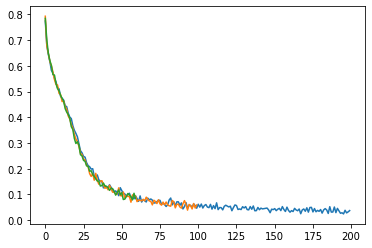

In [41]:
plt.plot(history200.history['loss'], label ='200 epochs')
plt.plot(history100.history['loss'], label = '100 epochs')
plt.plot(history60.history['loss'], label ='60 epochs')

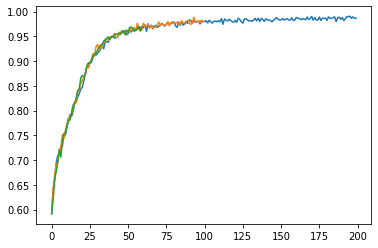

In [40]:
plt.plot(history200.history['accuracy'], label = '200 epochs')
plt.plot(history100.history['accuracy'], label = '100 epochs')
plt.plot(history60.history['accuracy'], label ='60 epochs')

# Corrected code - feature elimination

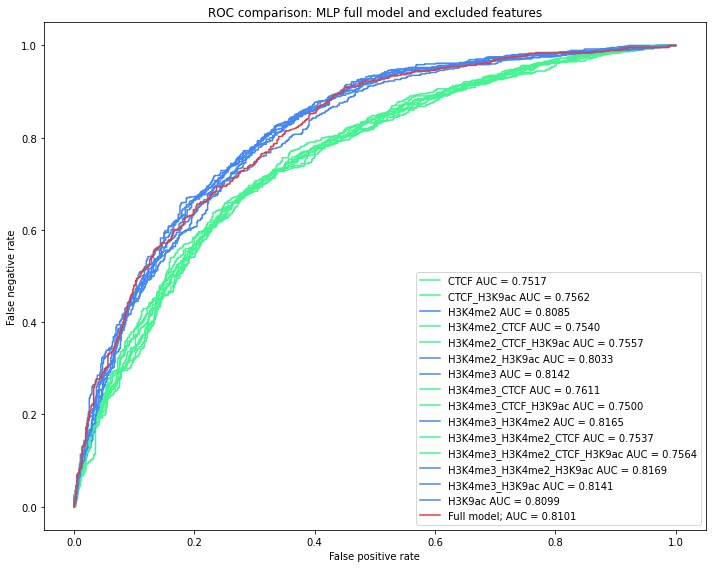

In [29]:
# Plot for MLP
result_folder = Path("results/0512_corrected_feature_exclusion/")
file_list = os.listdir(result_folder)
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
for file_path in file_list:
    if file_path[-4:] == ".npz":
        file = np.load(result_folder/file_path, 'r')
        data_auc = metrics.auc(file['fpr'],file['tpr'])
        
        
        if "CTCF" in file_path:
            data_name = file_path[17:-4]+ ' AUC = {0:.4f}'.format(data_auc)
            ax.plot(file['fpr'], file['tpr'], label = data_name, color="#42f590")
        elif "full_model" in file_path:
            data_name = "Full model;"+ ' AUC = {0:.4f}'.format(data_auc)
            ax.plot(file['fpr'], file['tpr'], label = data_name, color="#e33d3d")
        else:
            data_name = file_path[17:-4]+ ' AUC = {0:.4f}'.format(data_auc)
            ax.plot(file['fpr'], file['tpr'], label = data_name, color = "#4287f5")
ax.set_xlabel('False positive rate')
ax.set_ylabel('False negative rate')
ax.set_title("ROC comparison: MLP full model and excluded features")
ax.legend(prop={'size': 10})
fig.tight_layout()
fig.savefig(result_folder/"0516_mlp_ROC_excluded_features_colorcoded.png")

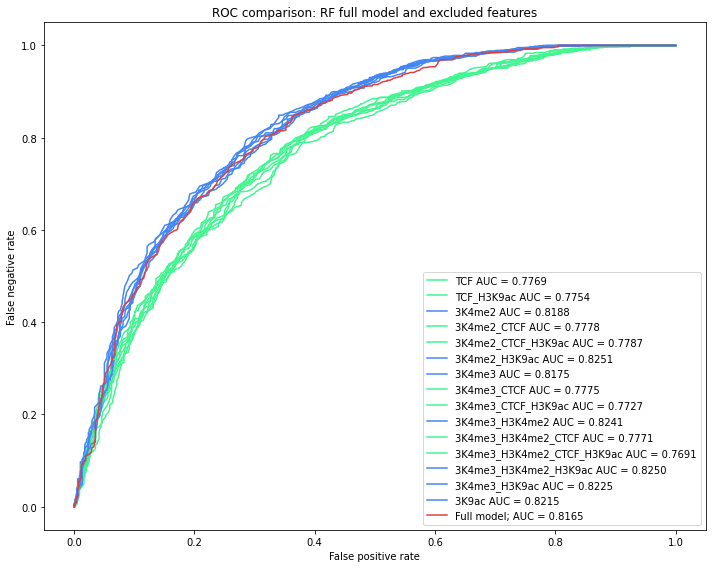

In [5]:
# Plot for RF
result_folder = Path("results/0517_corrected_feature_exclusion/")
file_list = os.listdir(result_folder)
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
for file_path in file_list:
    if file_path[-4:] == ".npz":
        file = np.load(result_folder/file_path, 'r')
        data_auc = metrics.auc(file['fpr'],file['tpr'])
        
        
        if "CTCF" in file_path:
            data_name = file_path[17:-4]+ ' AUC = {0:.4f}'.format(data_auc)
            ax.plot(file['fpr'], file['tpr'], label = data_name, color="#42f590")
        elif "full_model" in file_path:
            data_name = "Full model;"+ ' AUC = {0:.4f}'.format(data_auc)
            ax.plot(file['fpr'], file['tpr'], label = data_name, color="#e33d3d")
        else:
            data_name = file_path[17:-4]+ ' AUC = {0:.4f}'.format(data_auc)
            ax.plot(file['fpr'], file['tpr'], label = data_name, color = "#4287f5")
ax.set_xlabel('False positive rate')
ax.set_ylabel('False negative rate')
ax.set_title("ROC comparison: RF full model and excluded features")
ax.legend(prop={'size': 10})
fig.tight_layout()
fig.savefig(result_folder/"0516_rf_ROC_excluded_features_colorcoded.png")